In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('train.csv')

# Create dataset onehot
df_dummy = pd.get_dummies(df,drop_first=True)

x = df_dummy.drop(['churn_yes'], axis = 1)
y = df_dummy['churn_yes']

x_train, x_test, y_train, y_test = train_test_split(x, y , test_size = 0.2, random_state=42, stratify = y)


In [16]:
model_xgb =  xgb.XGBClassifier(objective='binary:logistic',seed = 42, early_stopping_rounds=10)
model_xgb.fit (x_train, y_train,
              verbose = True,
              eval_metric = 'aucpr',
              eval_set = [(x_test, y_test)])

[0]	validation_0-aucpr:0.78823
[1]	validation_0-aucpr:0.82263
[2]	validation_0-aucpr:0.81561
[3]	validation_0-aucpr:0.81619
[4]	validation_0-aucpr:0.82432
[5]	validation_0-aucpr:0.83197
[6]	validation_0-aucpr:0.83632
[7]	validation_0-aucpr:0.83460
[8]	validation_0-aucpr:0.83856
[9]	validation_0-aucpr:0.84438
[10]	validation_0-aucpr:0.84542
[11]	validation_0-aucpr:0.84624
[12]	validation_0-aucpr:0.84743
[13]	validation_0-aucpr:0.84631
[14]	validation_0-aucpr:0.84591
[15]	validation_0-aucpr:0.84620
[16]	validation_0-aucpr:0.84701
[17]	validation_0-aucpr:0.84756
[18]	validation_0-aucpr:0.84774
[19]	validation_0-aucpr:0.84675
[20]	validation_0-aucpr:0.84665
[21]	validation_0-aucpr:0.84595
[22]	validation_0-aucpr:0.84821
[23]	validation_0-aucpr:0.84868
[24]	validation_0-aucpr:0.84998
[25]	validation_0-aucpr:0.84975
[26]	validation_0-aucpr:0.85032
[27]	validation_0-aucpr:0.85045
[28]	validation_0-aucpr:0.85042
[29]	validation_0-aucpr:0.84968
[30]	validation_0-aucpr:0.85065
[31]	validation_0-

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [17]:
accuracy = model_xgb.score(x_test, y_test)
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 95.65%


C:\Users\vy\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


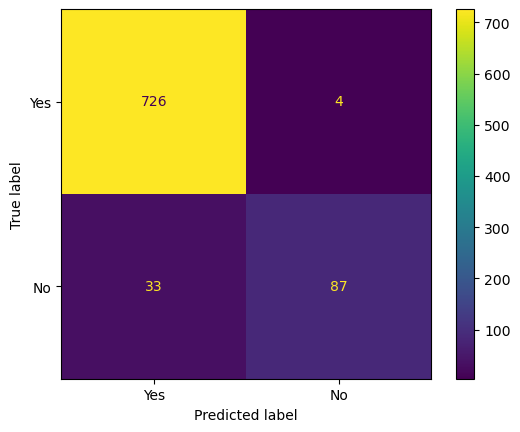

In [18]:
plot_confusion_matrix(model_xgb, x_test, y_test, values_format='d', display_labels=['Yes','No'])

In [20]:
from sklearn.metrics import classification_report

#Performance evaluation
def print_scores(y_true, y_pred):
  print(classification_report(y_true, y_pred))

#predict
y_pred = model_xgb.predict(x_test)

print_scores(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       730
           1       0.96      0.72      0.82       120

    accuracy                           0.96       850
   macro avg       0.96      0.86      0.90       850
weighted avg       0.96      0.96      0.95       850



In [21]:
87/(87+33)

0.725